# Ejercicio Ridge, Lasso y ElasticNet
Para este ejercicio vas a trabajar con datos de ventas de una empresa que fabrica muebles en España. Esta empresa es una Pyme que demanda conocer de antemano qué ingresos va a tener cada mes, ya que necesita pedir un anticipio a su entidad financiera de cara a poder abastecerse de materia prima al comenzar el mes. Como desconoce cuánto tiene que pedir, tira al alza y acaba pagando muchos intereses. El objetivo es reducir estos gastos.

En las bases de datos de la empresa constan todos los gastos en publicidad y ventas, para cada uno de los meses desde su fundación (hace más de 15 años).

Dado que los presupuestos de marketing se cierran al principio de cada mes, la empresa necesita un modelo predictivo que le anticipe las ventas que conseguirá a final de mes en función de los gastos que realizará en marketing.

Para ello tendrás que utilizar tanto modelos de regresión normales, como regularizados.

1. Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.
2. Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el performance del modelo.
3. Interpreta los resultados. Traduce a una fórmula tu mejor modelo (escribir la fórmula simplemente). ¿Cuánto cambian las ventas si aumentamos la inversión en radio un punto más? ¿Y si aumentamos la inversión en TV o periódicos?

## Import libraries 

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Exploratory Data Analysis 

In [ ]:
# Lectura datos, relación variables, mapas de correlación...

In [ ]:
# Utiliza todas las celdas que necesites...

In [2]:
df = pd.read_csv('data/Advertising.csv', index_col=0)
df

,TV,radio,newpaper,sales
0,230.1,37.8,6s9.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0
...,...,...,...,...
195,38.2,3.7,13.8,7600.0
196,94.2,4.9,8.1,9700.0
197,177.0,9.3,6.4,12800.0
198,283.6,42.0,66.2,25500.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TV        200 non-null    float64
 1   radio     200 non-null    float64
 2   newpaper  200 non-null    object 
 3   sales     200 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.8+ KB


In [4]:
df.rename(columns={'newpaper':'newspaper'}, inplace=True)

In [6]:
df['newspaper'] = df['newspaper'].str.replace('s','')
df['newspaper'] = df['newspaper'].astype(float)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [8]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14022.500000
std,85.854236,14.846809,21.778621,5217.456566
min,0.700000,0.000000,0.300000,1600.000000
25%,74.375000,9.975000,12.750000,10375.000000
50%,149.750000,22.900000,25.750000,12900.000000
75%,218.825000,36.525000,45.100000,17400.000000
max,296.400000,49.600000,114.000000,27000.000000


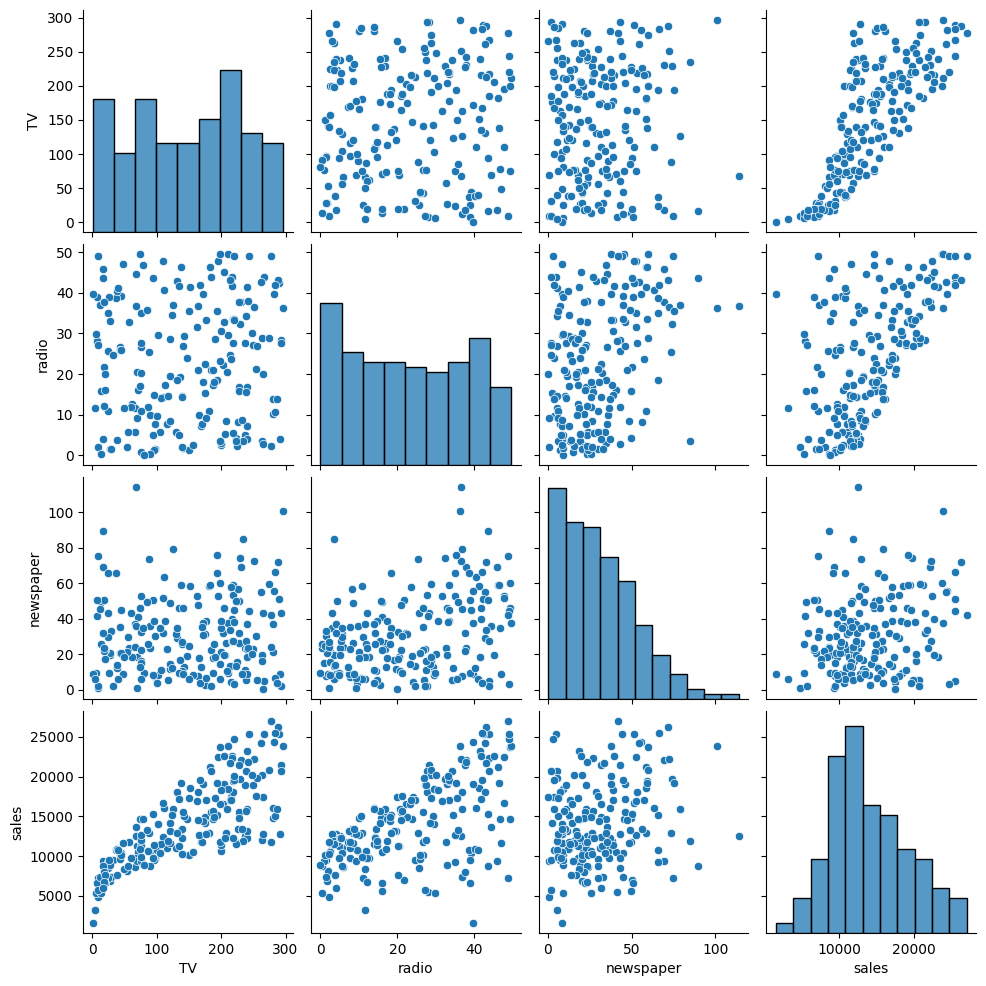

In [9]:
sns.pairplot(df)

<Axes: >

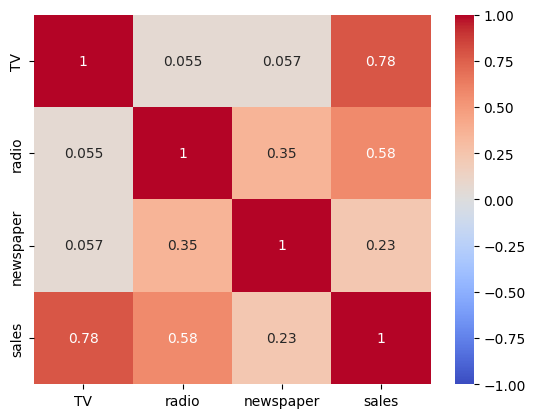

In [10]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1)

## Modelado

In [ ]:
# Manipulación datasets, entrenamiento, evaluación, nuevas iteraciones... Prueba modelos sin y con regularización.

In [ ]:
# Utiliza todas las celdas que necesites...

In [11]:
X = df[['TV','radio','newspaper']]
y = df['sales']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [30]:
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('MSE', mean_squared_error(y_test, y_pred))
print('RMSE', mean_squared_error(y_test, y_pred)**(1/2))

R2 score 0.899438024100912
MAE 1460.7567168117605
MSE 3174097.3539761053
RMSE 1781.5996615334504


In [32]:
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('R2 score', r2_score(y_test, y_pred))
    print('MAE', mean_absolute_error(y_test, y_pred))
    print('MSE', mean_squared_error(y_test, y_pred))
    print('RMSE', mean_squared_error(y_test, y_pred)**(1/2))
    return model

In [16]:
model_1 = train_evaluate_model(LinearRegression(), X_train, y_train, X_test, y_test)
model_1

R2 score 0.899438024100912
MAE 1460.7567168117605
MSE 3174097.3539761053
RMSE 1781.5996615334504


LinearRegression()

model_2: Mismo modelo, pero escalado

In [34]:
scaler = StandardScaler()
# scaler.fit(X_train
X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

In [23]:
pd.DataFrame(X_train_scal).describe()

,0,1,2
count,1.600000e+02,1.600000e+02,1.600000e+02
mean,-2.942091e-16,-2.081668e-16,1.665335e-17
std,1.003140e+00,1.003140e+00,1.003140e+00
min,-1.774345e+00,-1.549957e+00,-1.462335e+00
25%,-8.587688e-01,-8.842559e-01,-8.420458e-01
50%,7.493646e-03,-1.135334e-01,-2.143574e-01
75%,8.176095e-01,9.180491e-01,7.179263e-01
max,1.739424e+00,1.810732e+00,3.499979e+00


In [24]:
scaler = MinMaxScaler()
# scaler.fit(X_train
X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)
pd.DataFrame(X_train_scal).describe()

,0,1,2
count,160.000000,160.000000,160.000000
mean,0.504969,0.461202,0.294688
std,0.285488,0.298492,0.202152
min,0.000000,0.000000,0.000000
25%,0.260568,0.198085,0.125000
50%,0.507102,0.427419,0.251491
75%,0.737656,0.734375,0.439364
max,1.000000,1.000000,1.000000


In [35]:
model_2 = train_evaluate_model(LinearRegression(), X_train_scal, y_train, X_test_scal, y_test)
model_2

R2 score 0.8994380241009119
MAE 1460.7567168117607
MSE 3174097.353976108
RMSE 1781.5996615334514


LinearRegression()

In [40]:
model_3 = train_evaluate_model(Ridge(alpha=1), X_train_scal, y_train, X_test_scal, y_test)
model_3

R2 score 0.8988025280800617
MAE 1464.3012916475109
MSE 3194155.8922079643
RMSE 1787.2201577332223


Ridge(alpha=1)

In [52]:
lr.fit(X_train_scal, y_train)
y_pred = lr.predict(X_test_scal)
baseline_error = mean_squared_error(y_pred, y_test)

n_alphas = 100
alphas = np.logspace(-4, 3, n_alphas) 

coef_ridge = []
err_ridge = []
baseline = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_scal, y_train)
    
    y_pred = ridge.predict(X_test_scal)
    ridge_error = mean_squared_error(y_pred, y_test)
    
    err_ridge.append(ridge_error)
    baseline.append(baseline_error)

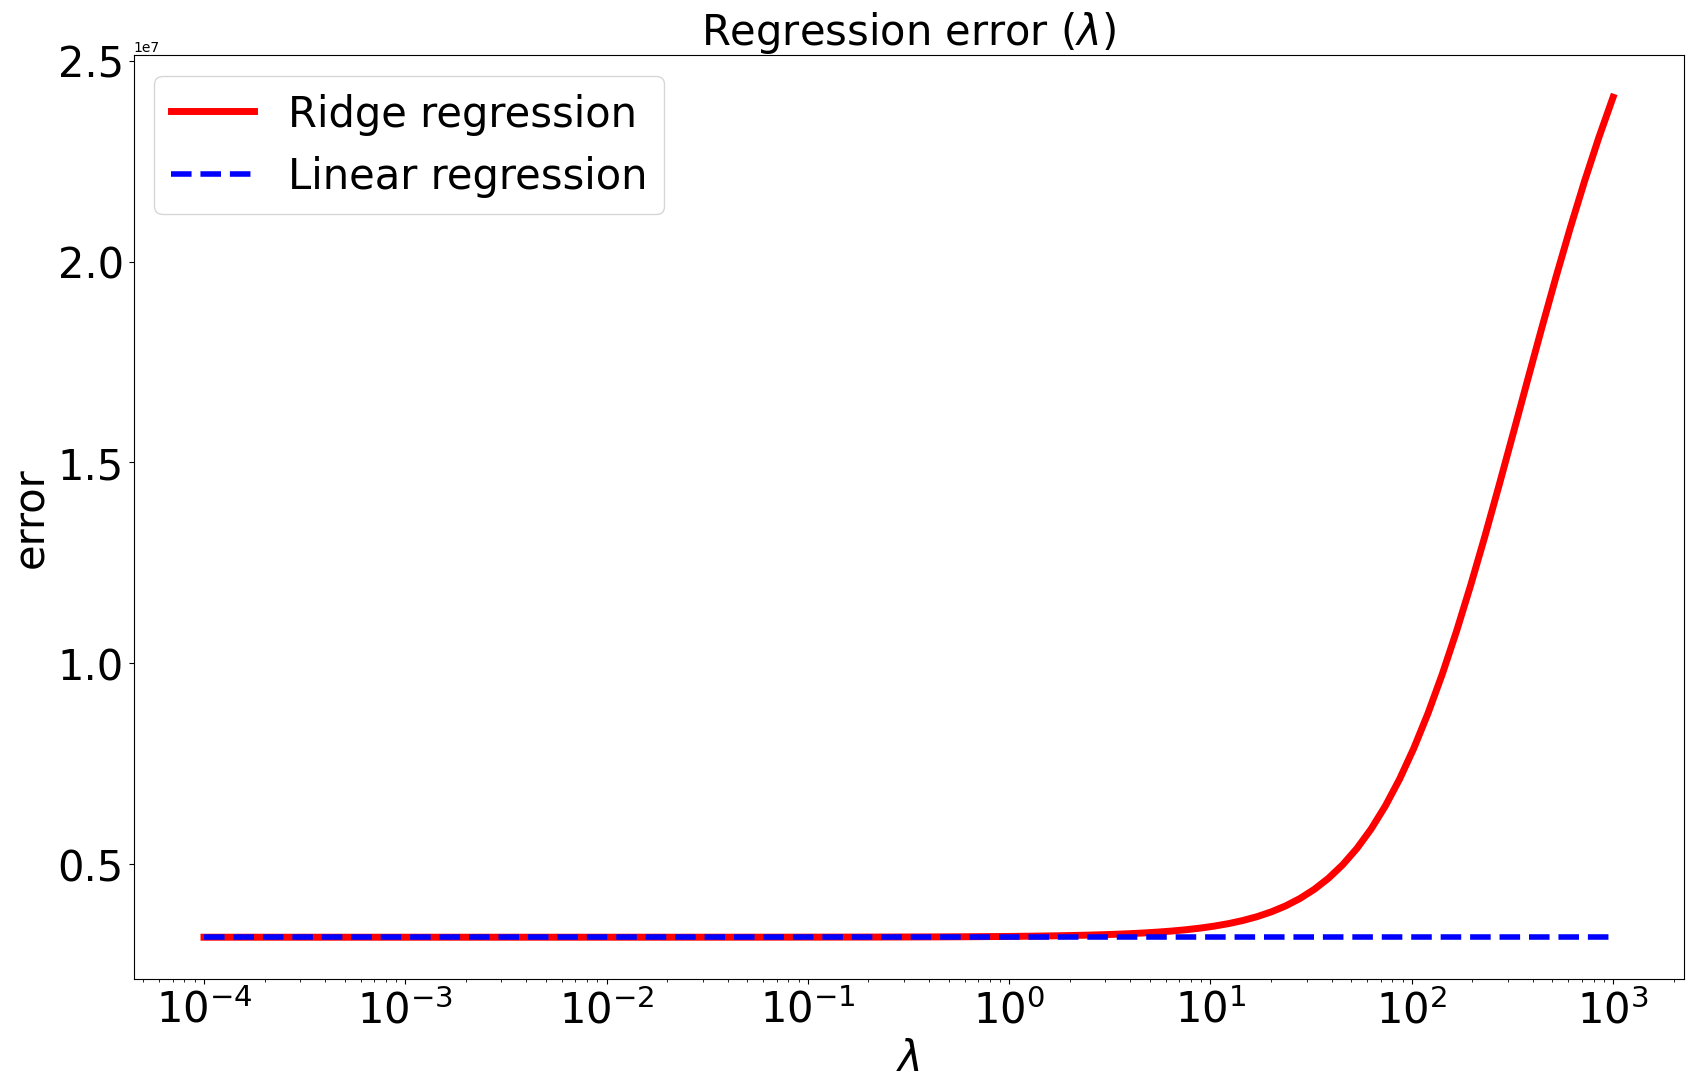

In [55]:
plt.figure(figsize=(20,12))
ax = plt.gca()
ax.plot(alphas, err_ridge, linewidth=5, color='red', label="Ridge regression")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.show()

In [56]:
lr.fit(X_train_scal, y_train)
y_pred = lr.predict(X_test_scal)
baseline_error = mean_squared_error(y_pred, y_test)

n_alphas = 100
alphas = np.logspace(-4, 3, n_alphas) 

err_lasso = []
baseline = []

for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train_scal, y_train)
    
    y_pred = lasso.predict(X_test_scal)
    lasso_error = mean_squared_error(y_pred, y_test)
    
    err_lasso.append(lasso_error)
    baseline.append(baseline_error)

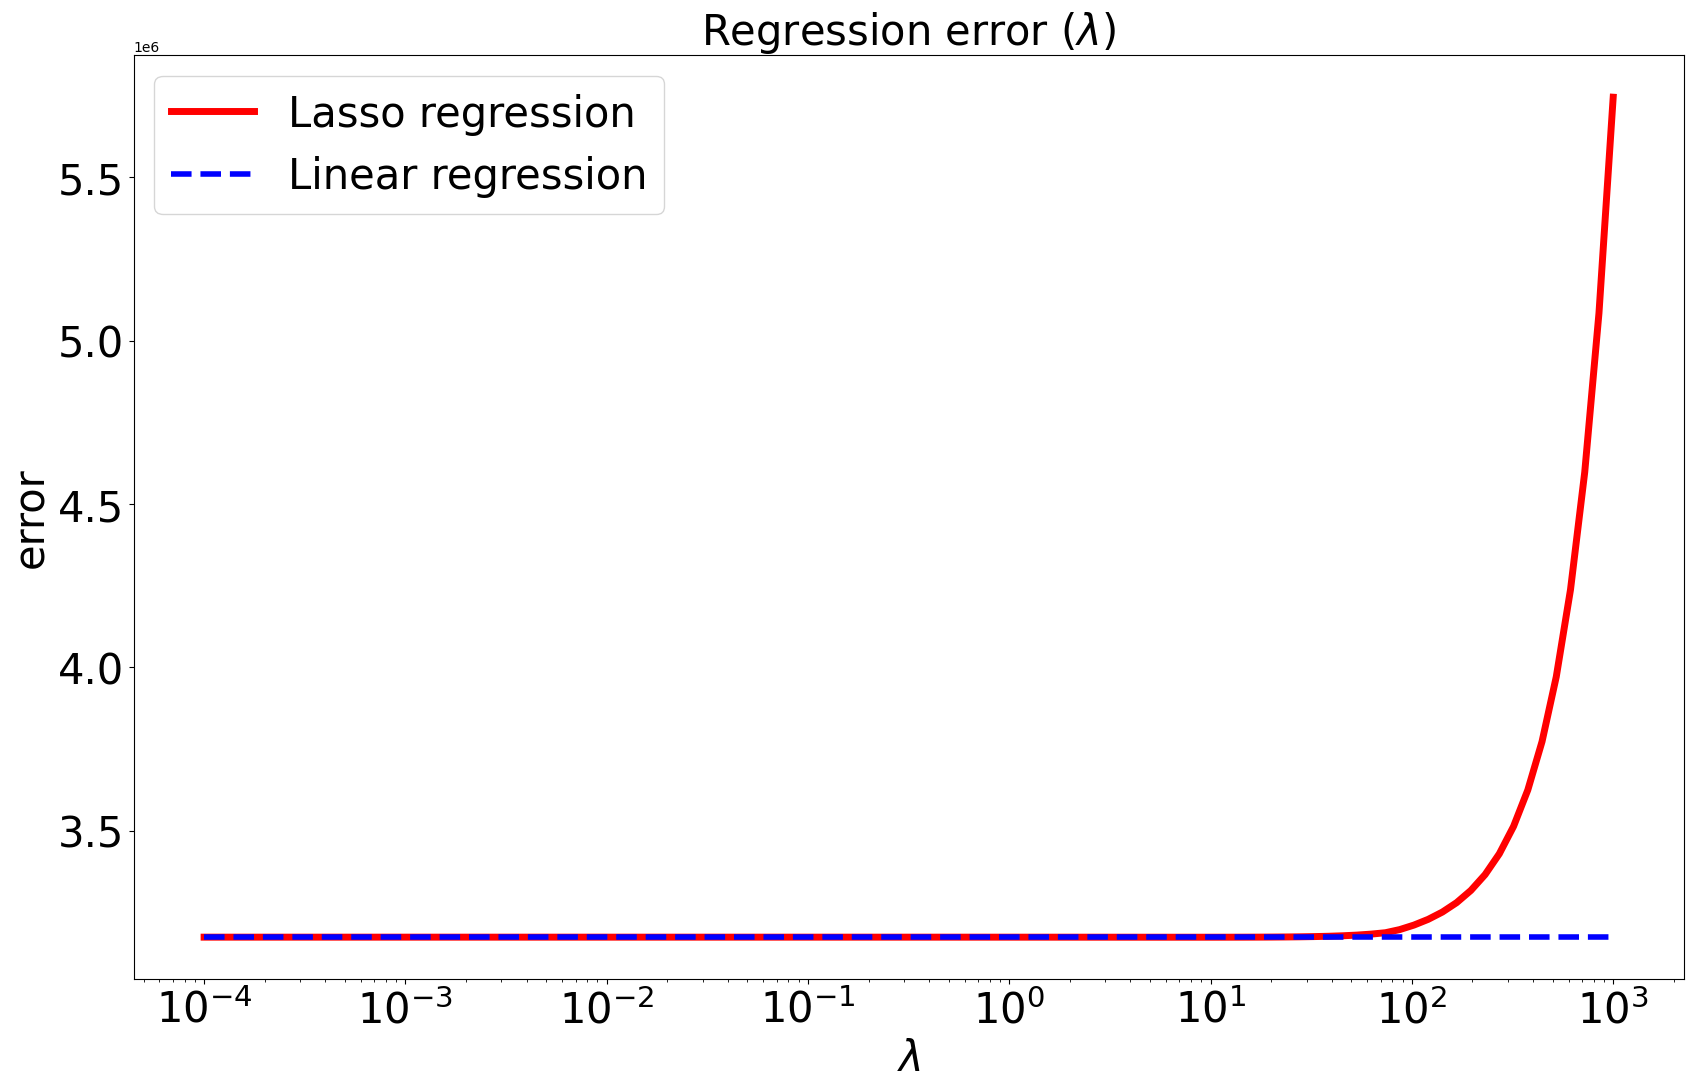

In [57]:
plt.figure(figsize=(20,12))
ax = plt.gca()
ax.plot(alphas, err_lasso, linewidth=5, color='red', label="Lasso regression")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.show()

## Debemos de aumentar la complejidad de nuestro modelo!

In [58]:
poly = PolynomialFeatures(degree=2)
poly.fit(X_train_scal)
X_poly_train = poly.transform(X_train_scal)
X_poly_test = poly.transform(X_test_scal)

In [59]:
model_4 = train_evaluate_model(LinearRegression(), X_poly_train, y_train, X_poly_test, y_test)
model_4

R2 score 0.9869181490609604
MAE 526.1794444043732
MSE 412910.2285378996
RMSE 642.5809120553611


LinearRegression()

In [71]:
poly = PolynomialFeatures(degree=3)
poly.fit(X_train_scal)
X_poly_train = poly.transform(X_train_scal)
X_poly_test = poly.transform(X_test_scal)

In [72]:
model_5 = train_evaluate_model(LinearRegression(), X_poly_train, y_train, X_poly_test, y_test)
model_5

R2 score 0.9906674629185215
MAE 388.68170486516067
MSE 294568.4090965977
RMSE 542.7415675039067


LinearRegression()

In [88]:
model_5_1 = train_evaluate_model(Ridge(alpha=0.3), X_poly_train, y_train, X_poly_test, y_test)
model_5_1

R2 score 0.9905857247610166
MAE 385.73559549691174
MSE 297148.35909395636
RMSE 545.1131617324575


Ridge(alpha=0.3)

In [101]:
model_5_2 = train_evaluate_model(Lasso(alpha=40), X_poly_train, y_train, X_poly_test, y_test)
model_5_2

R2 score 0.9935017653665097
MAE 338.46416247605663
MSE 205107.63806366804
RMSE 452.88810766420886


Lasso(alpha=40)

In [66]:
poly = PolynomialFeatures(degree=4)
poly.fit(X_train_scal)
X_poly_train = poly.transform(X_train_scal)
X_poly_test = poly.transform(X_test_scal)

In [67]:
model_6 = train_evaluate_model(LinearRegression(), X_poly_train, y_train, X_poly_test, y_test)
model_6

R2 score 0.9804220291083119
MAE 544.2500038819956
MSE 617951.1196745683
RMSE 786.0986704444731


LinearRegression()

## Resultados

In [ ]:
# Interpreta, resume y destaca los puntos importantes de los resultados.

In [ ]:
# Utiliza todas las celdas que necesites...

In [102]:
model_5_2

Lasso(alpha=40)

El modelo que mejor generaliza, es una regresión polinómica de grado 3, aplicando una regularización de Lasso

In [ ]:
# model_5_2.predict(poly.transform(X_new))